# Pool Elo

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import csv
from datetime import datetime

In [70]:
# Elo Rating System 
# Constants
INITIAL_RATING = 1500
ELO_WIDTH = 400
K = 50

In [69]:
def expected(A, B, elo_width): 
    proba = 1/ ( 1 + 10 ** ((B - A) / elo_width))
    return( proba )

# https://www.kaggle.com/kplauritzen/elo-ratings-in-python
def update_elo(winner_elo, loser_elo, k, elo_width):
    """
    https://en.wikipedia.org/wiki/Elo_rating_system#Mathematical_details
    """
    expected_win = expected(winner_elo, loser_elo, elo_width)
    change_in_elo = k * (1-expected_win)
    winner_elo += change_in_elo
    loser_elo -= change_in_elo
    return winner_elo, loser_elo

In [98]:

def run_tournament(data=data, INITIAL_RATING = INITIAL_RATING, ELO_WIDTH = ELO_WIDTH, k=K):
    
    # Initialize Elo Ratings
    elo_ratings = dict(zip(players.value_counts().index.unique(), 
                           np.repeat(INITIAL_RATING, nplayers)) )

    # Iterate through rows of dataframe 
    for index, row in data.iterrows():
        winner = row["WinnerName"]
        loser = row["LoserName"]
        if row['isSemi'] == True: 
            k = K*2
        elif row['isFinal'] == True: 
            k = K*3
        else: 
            k = K
        new_winner_rating, new_loser_rating = update_elo(elo_ratings[winner], elo_ratings[loser], k, ELO_WIDTH)
        elo_ratings[winner] = new_winner_rating
        elo_ratings[loser] = new_loser_rating
    ratings = pd.DataFrame.from_dict(elo_ratings, orient='index')
    ratings = ratings.rename(columns={0: "ratings"})
    return(ratings)

In [99]:
ratings = run_tournament()

KeyError: 'Kelly Fisher'

In [100]:
ratings.sort_values(by='ratings', ascending = False)

,ratings
Shannon Murphy,1475.0
Robby Foldvari,1475.0
Jang Moonseok,1475.0
Francois Ellis,1475.0
Himanshu Jain,1475.0
...,...
Albin Ouschan,800.0
Jayson Shaw,775.0
Alex Pagulayan,750.0
Dennis Orcollo,750.0


In [101]:
# Train-Test Split
winnersgroup = data[data.Group == 8]
prelims = data[data.Group != 8]

In [102]:
ratingsPrelims = run_tournament(data=prelims)

KeyError: 'Kelly Fisher'

In [103]:
ratingsPrelims
ratingsPrelims.sort_values(by='ratings', ascending = False)


NameError: name 'ratingsPrelims' is not defined

# Elo 

In [226]:
# Read Test Dataset 
data = pd.read_csv('data/predatorCLPClean.csv')
ratings.index

Index(['Shane Van Boening', 'Dennis Orcollo', 'Darren Appleton', 'Jayson Shaw',
       'Niels Feijen', 'Alex Pagulayan', 'Ralf Souquet', 'Thorsten Hohmann',
       'Albin Ouschan', 'Ko Pin Yi',
       ...
       'Andrea Klasovic', 'Joey Korsiak', 'Konrad Juszcyzszyn', 'Mark Antony',
       'Xue Zhenqi', 'Kuo Po Cheng', 'Fahad Salem N Alharbi', 'Aki Heiskanen',
       'Chris Compton', 'Reymart Lin'],
      dtype='object', length=885)

In [227]:
# Elo Rating System 
# Constants
INITIAL_RATING = 1500
ELO_WIDTH = 400
K = 50

players = pd.concat([fulldf.playerA, fulldf.playerB] )
print(players.value_counts().index.unique())
# How many players
nplayers = len(players.value_counts())
nplayers

Index(['Shane Van Boening', 'Dennis Orcollo', 'Darren Appleton', 'Jayson Shaw',
       'Niels Feijen', 'Alex Pagulayan', 'Ralf Souquet', 'Thorsten Hohmann',
       'Albin Ouschan', 'Ko Pin Yi',
       ...
       'Andrea Klasovic', 'Joey Korsiak', 'Konrad Juszcyzszyn', 'Mark Antony',
       'Xue Zhenqi', 'Kuo Po Cheng', 'Fahad Salem N Alharbi', 'Aki Heiskanen',
       'Chris Compton', 'Reymart Lin'],
      dtype='object', length=885)


885

In [229]:

def expected(A, B, elo_width): 
    proba = 1/ ( 1 + 10 ** ((B - A) / elo_width))
    return( proba )

# https://www.kaggle.com/kplauritzen/elo-ratings-in-python
def update_elo(winner_elo, loser_elo, k, elo_width):
    expected_win = expected(winner_elo, loser_elo, elo_width)
    change_in_elo = k * (1-expected_win)
    winner_elo += change_in_elo
    loser_elo -= change_in_elo
    return winner_elo, loser_elo

def run_tournament3(data=data, INITIAL_RATING = INITIAL_RATING, ELO_WIDTH = ELO_WIDTH, K=K):
    
    # Initialize Elo Ratings
    elo_ratings = dict(zip(players.value_counts().index.unique(), 
                           np.repeat(INITIAL_RATING, nplayers)) )

    # Iterate through rows of dataframe 
    for index, row in data.iterrows():
        if row['playerARacks'] > row['playerBRacks']: 
            winner = row["playerA"]
            loser = row["playerB"]
        else: 
            winner = row['playerB']
            loser = row['playerA']
        new_winner_rating, new_loser_rating = update_elo(elo_ratings[winner], elo_ratings[loser], K, ELO_WIDTH)
        elo_ratings[winner] = new_winner_rating
        elo_ratings[loser] = new_loser_rating
    ratings = pd.DataFrame.from_dict(elo_ratings, orient='index')
    ratings = ratings.rename(columns={0: "ratings"})
    return(ratings)

In [230]:
ratings = run_tournament3(fulldf)

In [231]:
ratings
ratings.sort_values(by='ratings', ascending = False)[0:25]


,ratings
Jayson Shaw,1927.588698
Albin Ouschan,1782.909072
Joshua Filler,1782.604750
Liu Haitao,1776.916182
Eklent Kaci,1776.856838
Fedor Gorst,1767.150073
Alex Pagulayan,1743.332035
Jung-Lin Chang,1740.453030
Francisco Sanchez Ruiz,1738.721867
Jeffrey de Luna,1725.858950


In [232]:
playersCLP = pd.concat([data.playerA, data.playerB] )


In [233]:
# Get correct players
playersindex = []
names = []
for player in playersCLP.unique():
    if player in ratings.index:
        playersindex.append(np.where(players.value_counts().index == player)[0][0])
        names.append(np.where(ratings.index == player)[0][0])
playersindex
names

[17, 8, 661, 27, 4, 6, 313, 49, 11, 2, 89, 23, 86, 108, 16, 97, 41, 350]

In [234]:
# Games in the prior dataset
players.value_counts()[playersindex]
fullPlayerList = list(players.value_counts()[playersindex].index)
print(fullPlayerList)
fullPlayerList.append("Kristina Tkach")
# fullPlayerList.append("Kelly Fisher")

CLPratings = ratings.iloc[np.array(names)]
print(CLPratings)
CLPratings = CLPratings.append([{"ratings": 1500}], ignore_index = True)

CLPratings = CLPratings.set_index(pd.Index(fullPlayerList) )

['Chris Melling', 'Albin Ouschan', 'Kelly Fisher', 'Eklent Kaci', 'Niels Feijen', 'Ralf Souquet', 'Chris Robinson', 'Mieszko Fortunski', 'David Alcaide', 'Darren Appleton', 'Billy Thorpe', 'Naoyuki Oi', 'Roberto Gomez', 'Marc Bijsterbosch', 'Alex Kazakis', 'Casper Matikainen', 'Denis Grabe', 'Jasmin Ouschan']
                       ratings
Chris Melling      1531.759604
Albin Ouschan      1782.909072
Kelly Fisher       1479.873000
Eklent Kaci        1776.856838
Niels Feijen       1690.972197
Ralf Souquet       1630.750697
Chris Robinson     1489.693116
Mieszko Fortunski  1682.472201
David Alcaide      1704.777385
Darren Appleton    1615.436865
Billy Thorpe       1586.927934
Naoyuki Oi         1635.546721
Roberto Gomez      1440.988380
Marc Bijsterbosch  1414.630084
Alex Kazakis       1711.576271
Casper Matikainen  1620.330385
Denis Grabe        1528.497741
Jasmin Ouschan     1501.215876


In [209]:
CLPratings.sort_values(by = "ratings", ascending = False)

,ratings
Albin Ouschan,1782.909072
Eklent Kaci,1776.856838
Alex Kazakis,1711.576271
David Alcaide,1704.777385
Niels Feijen,1690.972197
Mieszko Fortunski,1682.472201
Naoyuki Oi,1635.546721
Ralf Souquet,1630.750697
Casper Matikainen,1620.330385
Darren Appleton,1615.436865


In [210]:

def expected(A, B, elo_width): 
    proba = 1/ ( 1 + 10 ** ((B - A) / elo_width))
    return( proba )

# https://www.kaggle.com/kplauritzen/elo-ratings-in-python
def update_elo(winner_elo, loser_elo, k, elo_width):
    """
    https://en.wikipedia.org/wiki/Elo_rating_system#Mathematical_details
    """
    expected_win = expected(winner_elo, loser_elo, elo_width)
    change_in_elo = k * (1-expected_win)
    winner_elo += change_in_elo
    loser_elo -= change_in_elo
    return winner_elo, loser_elo

import math

def get_loglikelihood(newdata, ratings, ELO_WIDTH = ELO_WIDTH):

    loglikelihood = 0
    # Iterate through rows of dataframe 
    for index, row in newdata.iterrows():
        if row['playerARacks'] > row['playerBRacks']: 
            winner = row["playerA"]
            loser = row["playerB"]
        else: 
            winner = row['playerB']
            loser = row['playerA']
        winnerrating = ratings.loc[winner]
        loserrating = ratings.loc[loser]
        proba = expected(winnerrating, loserrating, ELO_WIDTH)   
            

        loglikelihood += math.log(proba)

        
    return(loglikelihood)

In [211]:
get_loglikelihood(data, CLPratings)

-132.06663042205864

In [212]:
data

,Unnamed: 0,matchIndex,playerA,playerB,playerARacks,playerBRacks,playerARacks.1,date,competition
0,0,1,Chris Melling,Ralf Souquet,5,0,5,2021-03-22,2021 Predator CLP
1,1,2,Albin Ouschan,Chris Robinson,5,2,5,2021-03-22,2021 Predator CLP
2,2,3,Kelly Fisher,Niels Feijen,5,4,5,2021-03-22,2021 Predator CLP
3,3,4,Eklent Kaci,Albin Ouschan,5,4,5,2021-03-22,2021 Predator CLP
4,4,5,Niels Feijen,Chris Robinson,5,3,5,2021-03-22,2021 Predator CLP
...,...,...,...,...,...,...,...,...,...
187,187,188,Albin Ouschan,Niels Feijen,5,4,5,2021-03-29,2021 Predator CLP
188,188,189,Naoyuki Oi,David Alcaide,5,4,5,2021-03-29,2021 Predator CLP
189,189,190,Albin Ouschan,Eklent Kaci,5,2,5,2021-03-29,2021 Predator CLP
190,190,191,David Alcaide,Chris Melling,5,2,5,2021-03-29,2021 Predator CLP


# Tuning K

In [213]:
K = np.arange(1, 101, 1)

In [215]:
log_likelihoods = []
for k in K: 
    # Get ratings 
    allratings = run_tournament3(fulldf, K=k)
    
    # Filter ratings 
    CLPratings = allratings.iloc[np.array(names)]
    CLPratings = CLPratings.append([{"ratings": 1500}], ignore_index = True)
    CLPratings = CLPratings.set_index(pd.Index(fullPlayerList) )
    
    log_likelihoods.append(get_loglikelihood(data, CLPratings))

Optimal K is 17


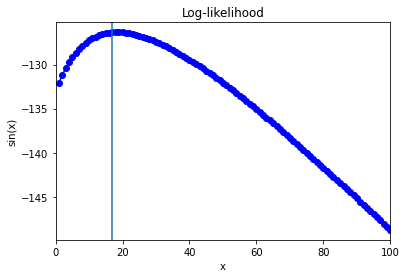

In [216]:
ax = plt.axes()
ax.plot(K, log_likelihoods, '--bo')
ax.axvline(log_likelihoods.index(max(log_likelihoods)))
ax.set(xlim=(0, 100),
       xlabel='x', ylabel='sin(x)',
       title='Log-likelihood');
print("Optimal K is " + str(log_likelihoods.index(max(log_likelihoods))))

In [217]:
# Get ratings 
allratings = run_tournament3(fulldf, K=17)
allratings.sort_values(by='ratings', ascending = False)[0:25]


,ratings
Jayson Shaw,1707.306321
Albin Ouschan,1665.831294
Shane Van Boening,1664.285523
Joshua Filler,1642.955816
Liu Haitao,1626.754957
Carlo Biado,1625.149106
Dennis Orcollo,1624.655451
Eklent Kaci,1623.074717
David Alcaide,1612.490415
Niels Feijen,1611.825220


In [225]:
# Filter ratings 
CLPratings = allratings.iloc[np.array(names)]
CLPratings = CLPratings.append([{"ratings": 1500}], ignore_index = True)
CLPratings = CLPratings.set_index(pd.Index(fullPlayerList) )
CLPratings.sort_values(by='ratings', ascending = False)

,ratings
Albin Ouschan,1665.831294
Eklent Kaci,1623.074717
David Alcaide,1612.490415
Niels Feijen,1611.825220
Alex Kazakis,1608.147209
Darren Appleton,1569.688539
Mieszko Fortunski,1566.344768
Ralf Souquet,1561.831831
Naoyuki Oi,1554.296270
Casper Matikainen,1540.105313


# Update Posterior Ratings after Predator CLP

In [222]:

def run_tournament_with_prior_ratings(data, priorratings, ELO_WIDTH = ELO_WIDTH, K=17):
    

    # Initialize Elo Ratings
    elo_ratings = priorratings

    # Iterate through rows of dataframe 
    for index, row in data.iterrows():
        if row['playerARacks'] > row['playerBRacks']: 
            winner = row["playerA"]
            loser = row["playerB"]
        else: 
            winner = row['playerB']
            loser = row['playerA']
        k=K
#         if row['isSemi'] == True: 
#             k = K*2
#         elif row['isFinal'] == True: 
#             k = K*3
#         else: 
#             k = K
        new_winner_rating, new_loser_rating = update_elo(elo_ratings.loc[winner][0], elo_ratings.loc[loser][0], k, ELO_WIDTH)
        elo_ratings.loc[winner][0] = new_winner_rating
        elo_ratings.loc[loser][0] = new_loser_rating
    return(elo_ratings)

In [223]:
posterior_ratings = run_tournament_with_prior_ratings(data, priorratings = CLPratings)

In [224]:
posterior_ratings.sort_values(by = "ratings", ascending = False)

,ratings
Eklent Kaci,1673.724199
Albin Ouschan,1673.650080
David Alcaide,1653.893033
Niels Feijen,1616.174914
Alex Kazakis,1604.983189
Naoyuki Oi,1581.602371
Chris Melling,1576.447312
Denis Grabe,1538.531136
Darren Appleton,1537.882863
Mieszko Fortunski,1535.352649


In [ ]:
# Things to Extend 
    # Figure out how to extend K 
        # K varying as a function of scoreline
    # Glicko 
        
    # Data collection 